# Declaration of Originality

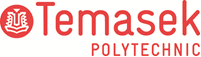

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Ng Yu Yang (2400818G)
* Tutorial Group                : T07
* Tutor						    : Ester Goh
* Submission Date               : 11 Febuary 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: The goal of this project is to develop a supervised machine learning model of cars to predict the resale price of used cars based on vehicle attributes such as mileage, age, engine size, fuel type, and transmission. This helps buyers and sellers estimate a fair market price and make informed decisions when purchashing or selling th car to ensure fairness.

Problem Type:
Regression (car price)

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('used_cars.csv')
## View first few rows
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


Observation:
The dataset contains a mix of numerical and categorical variables. Numerical features include price, mileage, and engine size, while categorical features include fuel type and transmission. The target variable, price, is numerical, thus indicating a regression problem.

In [4]:
## Check for missing data
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

Observation:
The dataset contains missing values in some categorical columns, including fuel_type, accident and clean_title. As these columns are categorical, missing values will be handled using appropriate actions such as mode imputation or treating missing values as a separate category. However, some coloumns may be redundent and would be removed in data preperation portion.

In [5]:
## Describe data distribution
df.describe(include='all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:
The dataset contains both numerical and categorical features related to used cars. The target variable, price, currently appears as a categorical variable due to the presence of currency symbols and will need to be converted to a numerical format for regression modelling.

The model_year feature shows a wide range of values, indicating that car age may be a strong predictor of price. Several categorical features such as brand, fuel_type and accident are most likely to influence resale value. However, some features such as model and engine may require feature selection or grouping to avoid curse of dimensionality issues.

The clean_title column has only one unique value and therefore does not really provide useful information for prediction.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [6]:
## Convert price to numeric
df['price'] = (
    df['price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)

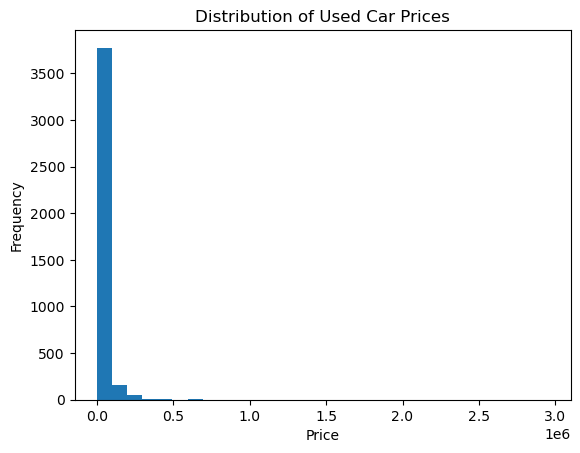

In [7]:
## Histogram
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].plot(kind='hist', bins=30)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Observation:
The distribution of used car prices is right-skewed, with most of the cars priced at a lower range and a small number of very high-priced vehicles. This means that there is outliers and suggests that median-based metrics such as MAE may be more appropriate than mean-based metrics for assessing model performace.

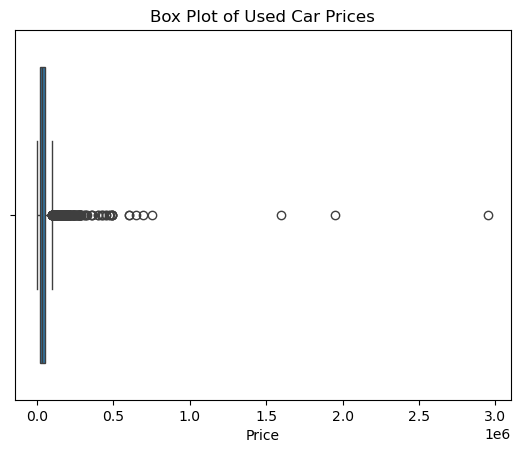

In [8]:
## Box plot
sns.boxplot(x=df['price'])
plt.title('Box Plot of Used Car Prices')
plt.xlabel('Price')
plt.show()

Observation:
The box plot shows that used car prices are highly right-skewed, with a few extreme high-value outliers between 1.5 and 3 million dollars which is beyond the upper whisker. This indicates that while most cars are priced within a typical range, a very small number of luxury or rare vehicles are there. These outliers may affect model training and evaluation and it can be improved during data preprocessing, by removing the extreme outliers.

### 2.3.1.2 Understanding distribution of features

In [9]:
## Convert milage to numeric
df['milage'] = (
    df['milage']
    .astype(str)
    .str.replace(' mi.', '', regex=False)
    .str.replace(',', '', regex=False)
)

df['milage'] = pd.to_numeric(df['milage'], errors='coerce')

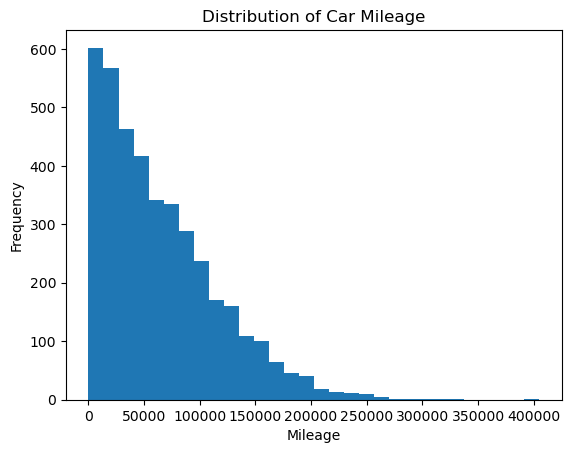

In [10]:
## Distribution of mileage
df['milage'].plot(kind='hist', bins=30)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

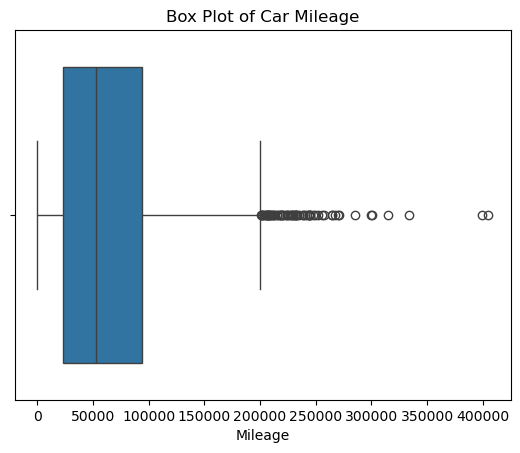

In [11]:
## Box plot of mileage
sns.boxplot(x=df['milage'])
plt.title('Box Plot of Car Mileage')
plt.xlabel('Mileage')
plt.show()

Observation:
The mileage for both box plot and histogram is right-skewed, with most cars having higher mileage values and a small number of low-mileage vehicles. The box plot indicates the presence of outliers, meanign that there is a large variation in vehicle usage.

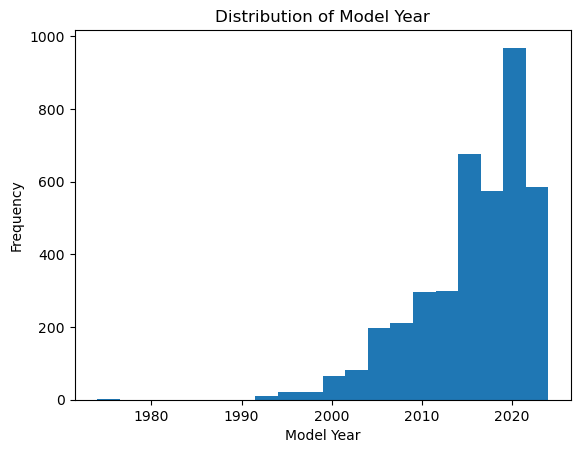

In [12]:
## Distribution of model year
df['model_year'].plot(kind='hist', bins=20)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

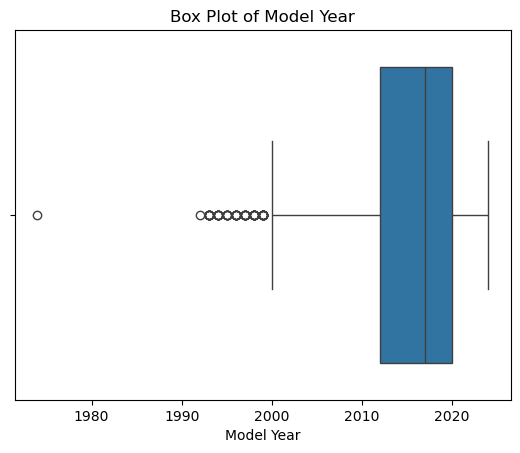

In [13]:
## Box plot of model year
sns.boxplot(x=df['model_year'])
plt.title('Box Plot of Model Year')
plt.xlabel('Model Year')
plt.show()

Observation:
Most of the vehicles were manufactured after 2010, indicating that newer cars are more common in the dataset. This suggests that model year is potentially a strong predictor of resale prices. Additionally there is a single outlier that might affect the model's effectiveness so removing it might be a good option.

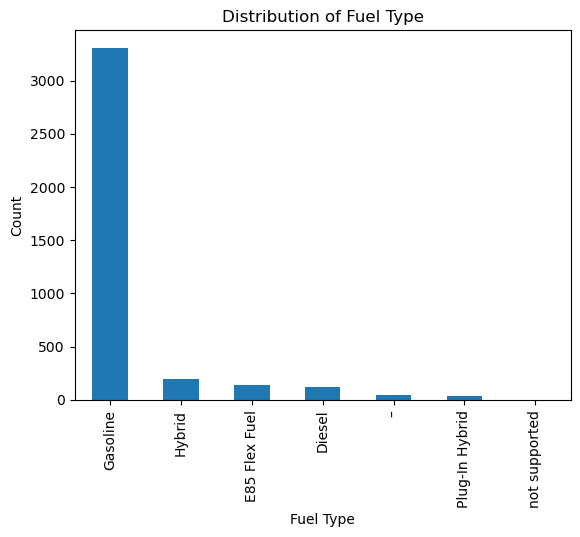

In [14]:
## Distribution of fuel type
df['fuel_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

Observation:
Gasoline is the most common fuel type in the dataset, while other fuel types come out less frequently. This feature is quite suitable for one-hot encoding during preprocessing.

### 2.3.2 Understanding relationship between variables

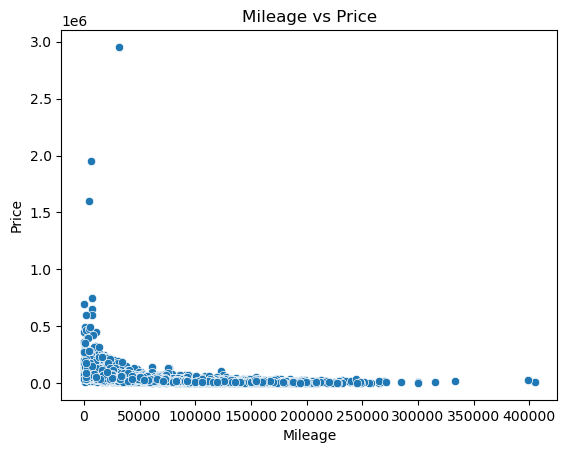

In [15]:
## Scatter plot of mileage vs price
sns.scatterplot(x='milage', y='price', data=df)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Observation:
There is a clear negative relationship between mileage and price. Cars with higher mileage tend to have lower resale prices, indicating that mileage is an important factor influencing used car value. While the relationship is not perfectly linear based on the scatter plot, the overall downward trend indicates that mileage is a significant factor influencing used car value.

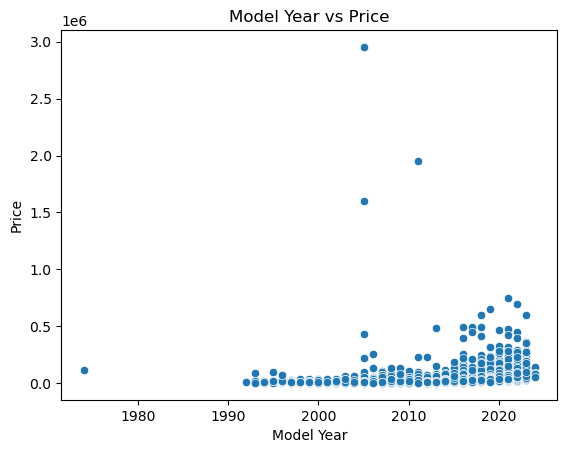

In [16]:
## Scatter plot of model year vs price
sns.scatterplot(x='model_year', y='price', data=df)
plt.title('Model Year vs Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

Observation:
There is a positive relationship between model year and price, where newer cars generally have higher resale values compared to older ones. This suggests that car age is a strong predictor of the car price.

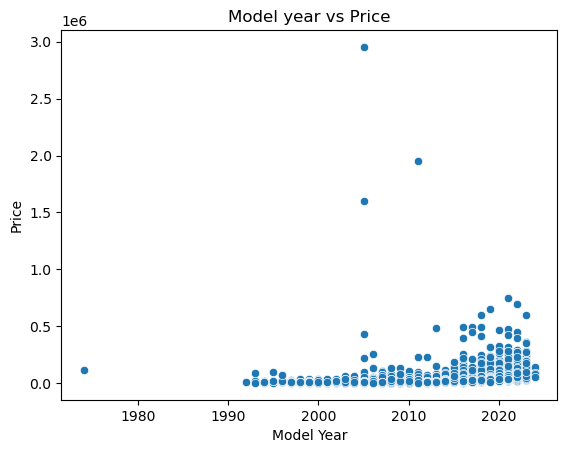

In [17]:
## Scatter plot of model year vs price
sns.scatterplot(x='model_year', y='price', data=df)
plt.title('Model year vs Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

Observation:
The scatter plot shows a clear negative relationship between car age and price, where newer vehicles mostly have higher resale values and prices decrease as car age increases. The spread of prices is wider for newer cars, suggesting that additional factors such as brand, engine type, and accident history also influence price. As car age increases, prices become more tightly clustered at lower values as seen in the graph above, indicating depreciation over time. This confirms that car age is a strong and meaningful predictor of used car price.

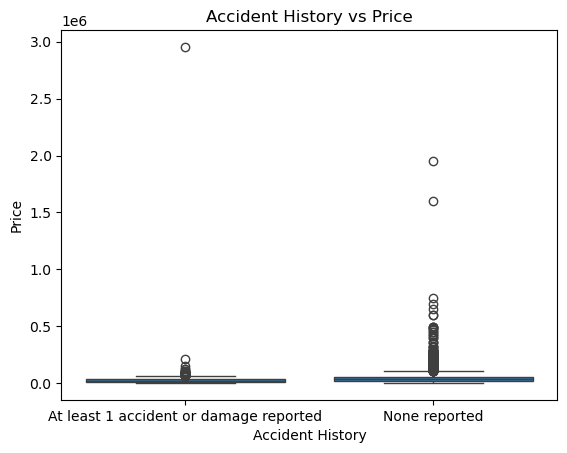

In [18]:
## Box plot of accident history vs price
sns.boxplot(x='accident', y='price', data=df)
plt.title('Accident History vs Price')
plt.xlabel('Accident History')
plt.ylabel('Price')
plt.show()

Observation:
The box plot shows a clear difference in price distribution between vehicles with reported accidents and those with no reported accidents. Cars with at least one accident generally have lower median resale prices and a narrower price range, resulting in low market value. However, cars with no reported accidents tend to have higher median prices and greater price range, including several high-value outliers. This suggests that accident history negatively impacts resale price, while no accident vehicles retain higher value and attract a wider price range depending on other factors such as brand and age.

Additionally, it can be encoded appropriately (e.g. using one-hot encoding) and included in the regression models to improve prediction accuracy.

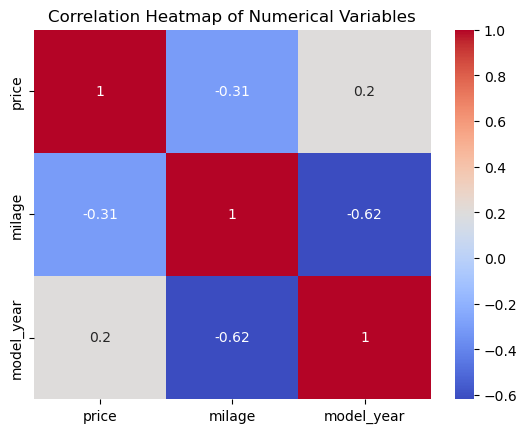

In [19]:
## Correlation heatmap
corr = df[['price', 'milage', 'model_year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Observation:
The heatmap shows a negative correlation between mileage and price, indicating that higher mileage vehicles tend to have lower resale values. Car age also shows a negative correlation with price, meaning that older vehicles are generally priced lower. The strong correlation between mileage and car age highlights potential redundancy. These results confirm that both mileage and vehicle age are important factors influencing used car prices.

# 3. Data Preparation

## 3.1 Data Cleaning

In [20]:
## Handle missing data
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)
df['accident'].fillna('Unknown', inplace=True)
## View cleaned DataFrame
df.info()
## Make sure there is no missing data
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


/var/folders/vn/nqs68wgd6v56wh8l58njc0sc0000gn/T/ipykernel_39349/1387314685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)
/var/folders/vn/nqs68wgd6v56wh8l58njc0sc0000gn/T/ipykernel_39349/1387314685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident          0
clean_title     596
price             0
dtype: int64

Explanation:

Missing values were handled to improve data quality and ensure consistency before model training. For the fuel_type column, missing values were filled using the mode, as fuel type is a categorical variable and the most common category provides a reasonable replacement for the missing values. For the accident column, missing values were replaced with the category “Unknown” to preserve potentially useful information rather than removing those records.

Additionally, the clean_title column was removed from the dataset as it contained little variation and did not provide meaningful predictive value to my model. After these cleaning steps, the dataset was checked to confirm that no missing values remained, ensuring that the data is suitable for further feature engineering and modelling.

In [21]:
## Remove only extreme outliers using extended IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df['price'] >= Q1 - 3.0 * IQR) &
    (df['price'] <= Q3 + 3.0 * IQR)
]

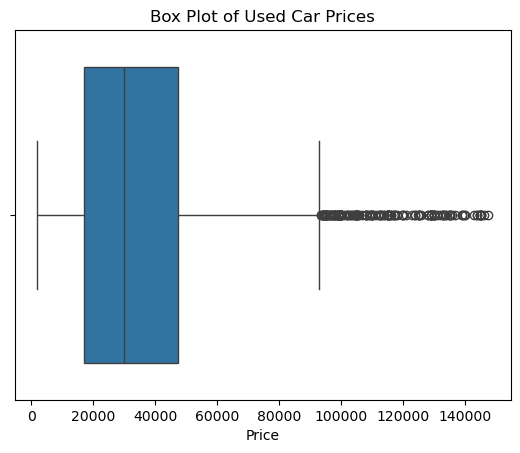

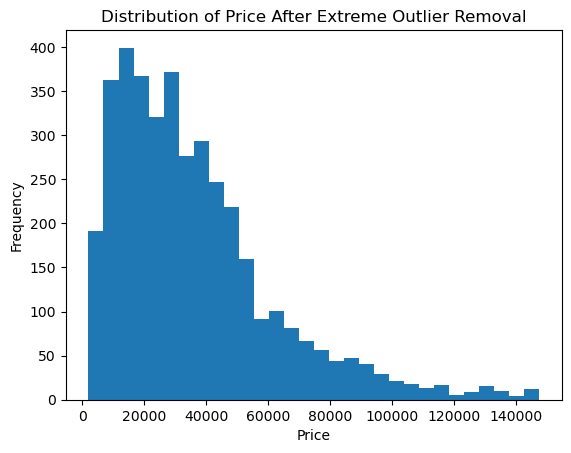

In [22]:
## Box plot of price after outlier removal
sns.boxplot(x=df['price'])
plt.title('Box Plot of Used Car Prices')
plt.xlabel('Price')
plt.show()

## Distribution of price after outlier removal
df['price'].plot(kind='hist', bins=30)
plt.title('Distribution of Price After Extreme Outlier Removal')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [23]:
## Remove extreme outliers for mileage using percentile
upper_milage = df['milage'].quantile(0.995)
df = df[df['milage'] <= upper_milage]

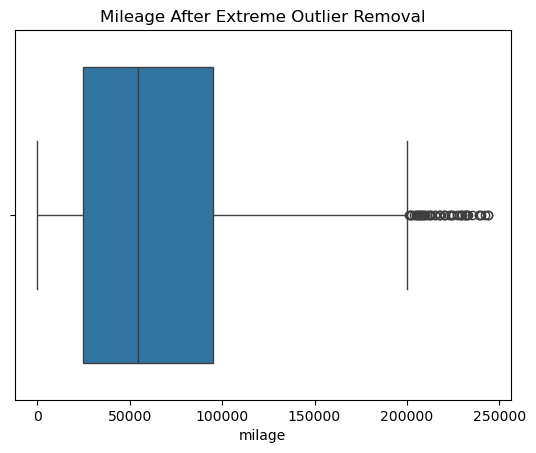

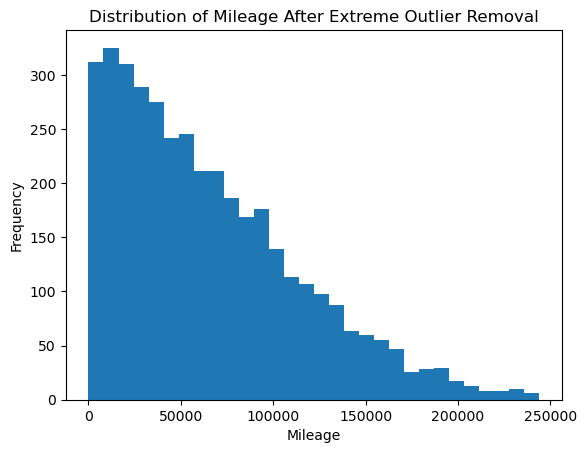

In [24]:
## Box plot after outlier removal
sns.boxplot(x=df['milage'])
plt.title('Mileage After Extreme Outlier Removal')
plt.show()

## Distribution of mileage after outlier removal
df['milage'].plot(kind='hist', bins=30)
plt.title('Distribution of Mileage After Extreme Outlier Removal')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

Outlier Handling:
Outlier handling was applied selectively to values with extreme values. For price, an extended IQR threshold was used to remove only extreme values while keeping valid high-priced vehicles. 

For mileage, a percentile-based approach was applied to remove super high values without over-cleaning the data. These steps reduce the influence of extreme anomalies and thus improve the model's overall stability while maintaining realistic market variation.

After removing extreme outliers, the distributions of price and mileage appear more compact while retaining realistic variability, confirming that valid observations were preserved.

In [25]:
## Extract engine size and horsepower from engine column to make numerical analysis easier
import re
df['engine'].head(10)

df['engine_liters'] = df['engine'].str.extract(r'(\d\.\d)L').astype(float)
df['engine_hp'] = df['engine'].str.extract(r'(\d{2,4})HP').astype(float)
df['engine_liters'] = df['engine_liters'].fillna(df['engine_liters'].median())
df['engine_hp'] = df['engine_hp'].fillna(df['engine_hp'].median())
df = df.drop('engine', axis=1)

df[['engine_liters', 'engine_hp']].describe()


,engine_liters,engine_hp
count,3865.000000,3865.000000
mean,3.659560,208.500000
std,1.337724,1.399173
min,1.000000,147.000000
25%,2.700000,208.500000
50%,3.500000,208.500000
75%,4.400000,208.500000
max,8.300000,270.000000


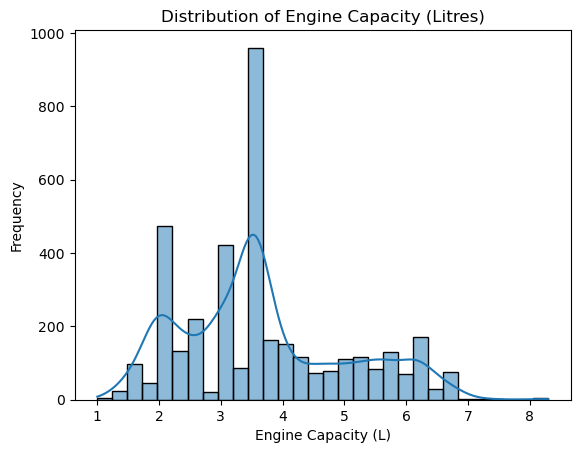

In [26]:
sns.histplot(df['engine_liters'], bins=30, kde=True)
plt.title('Distribution of Engine Capacity (Litres)')
plt.xlabel('Engine Capacity (L)')
plt.ylabel('Frequency')
plt.show()

The engine feature contained unstructured text describing engine specifications and can be very bad for the dataset for learning. To retain its predictive value while reducing dimensionality, numeric features representing engine capacity (litres) and horsepower (HP) were extracted using regular expressions (numerically). Missing values were imputed using the median. The original text-based engine feature was then removed.

In [27]:
df.duplicated().sum()

np.int64(0)

Duplicate Check:
A duplicate record check was done and no duplicate rows were found in the dataset.

## One-hot-encoding

In [28]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols].nunique().sort_values(ascending=False)


model           1826
ext_col          284
int_col          138
transmission      58
brand             56
fuel_type          7
accident           3
clean_title        1
dtype: int64

Before one-hot encoding, the number of unique values for each categorical feature was examined. Features with low to moderate cardinality were selected for encoding, while high-cardinality features were considered for removal to reduce dimensionality and prevent overfitting.

In [29]:
df = df.drop('model', axis=1)
df = df.drop('clean_title', axis=1)
## Y (target)
y = df['price']

## X (features)
X = df.drop('price', axis=1)
X = pd.get_dummies(X, drop_first=True)
X.head()
X.shape

(3865, 544)

The dataset was split into features (X) and target (y), after which categorical variables were encoded using one-hot encoding to prepare the data for regression modelling.

## 3.2 Train-Test Split

In [30]:
## Import train_test_split
from sklearn.model_selection import train_test_split

In [31]:
## Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=2026
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3092, 544), (773, 544), (3092,), (773,))

The dataset is split into training and testing sets using an 80–20 split. The training set is used to train the regression models, while the testing set is reserved for evaluating model performance on unseen data. A fixed random_state was used to ensure reproducibility.

# 4. Modelling

### 4.2 Train Model

In [32]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

## Train model
linr = LinearRegression()
linr.fit(X_train, y_train)

y_pred = linr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 10694.53685162319
MSE: 240464198.29204264
RMSE: 15506.908082917194
R2: 0.6313330264820548


Mean Absolute Error (MAE):
The model’s predictions has a difference from the actual used car prices by approximately $10700 on average. This means that there is a reasonable level of accuracy for a real-world pricing problem, where prices are influenced by many external factors.

Mean Squared Error (MSE):
The mean squared error of approximately 240 million shwoing the average squared difference between predicted and actual used car prices. The high MSE reflects the presence of large pricing errors for a few vehicles, mainly high-priced or uncommon cars. This is expected for a linear regression model, as it assumes linear relationships and may struggle to fully capture complex pricing patterns.

Root Mean Squared Error (RMSE):
The RMSE is higher than the MAE at $15507, suggesting that the model makes larger errors for a smaller number of vehicles. This is expected in used-car datasets due to high-priced or uncommon vehicles that are harder to predict accurately.

R2 Score:
An R2 value of 0.63 indicates that the model explains approximately 63% of the variance in used car prices. This shows that the selected features capture a good portion of the pricing behaviour, while also highlighting the presence of nonlinear relationships that a simple linear model cannot fully capture.

Linear Regression

Strengths

1. Provides a strong and interpretable baseline model

2. Demonstrates meaningful relationships between price and key features such as mileage, car age and engine specifications

3. Generalises reasonably well to unseen test data

Limitations

1. Assumes linear relationships between features and price which may not always be the case

2. Less effective at modelling complex interactions and nonlinear effects compared to other models

3. Sensitive to extreme values, even after outlier handling

In [33]:
## Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dt = DecisionTreeRegressor(
    max_depth=10,
    random_state=2026
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MAE:", mae_dt)
print("Decision Tree MSE:", mse_dt)
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2:", r2_dt)

Decision Tree MAE: 10170.271189584713
Decision Tree MSE: 242213922.7395683
Decision Tree RMSE: 15563.223404538287
Decision Tree R2: 0.6286504416268399


The decision tree regressor was trained with a maximum depth of 10.
This depth constraint helps to balance model flexibility and overfitting control, allowing the tree to capture non-linear patterns while limiting excessive memorisation of the training data.

Mean Absolute Error (MAE):
The model predicts used car prices with an average absolute error of approximately $10170. This means that, on average, predictions deviate from actual prices by around ten thousand dollars, which is reasonable given the wide price range of used vehicles.

Mean Squared Error (MSE):
The decision tree model records an MSE of approximately 242 million, which is slightly higher than the linear regression model. This suggests that while the decision tree captures non-linear relationships, it produces larger squared errors for certain vehicles. It may be due to sharp splits, leading to unstable predictions for outliers or less common vehicle configurations. The high MSE highlights the model’s tendency to overfit local patterns, resulting in larger errors on unseen data.

Root Mean Squared Error (RMSE):
The RMSE of $15563 is higher than the MAE, suggesting that the model makes larger errors for a subset of vehicles. This is expected in decision tree models, as individual splits may produce sharp prediction boundaries that are sensitive to unusual or high-priced cars.

R2 Score:
An R2 value of 0.63 shows that the decision tree explains approximately 63% of the variance in used car prices. This shows that the model captures meaningful relationships between features and price, including non-linear effects that are not explicitly modelled by linear methods.

Decision Tree

Strengths

1. Captures non-linear relationships between the features and price

2. Handles feature interactions naturally without manual specification

3. Produces interpretable decision rules

Limitations

1. Sensitive to data noise and outliers

2. Can overfit if tree depth is not controlled properly

3. Performance may chanage depending on tree structure

In [34]:
## Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=2026
)

gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting MAE:", mae_gbr)
print("Gradient Boosting MSE:", mse_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)
print("Gradient Boosting R2:", r2_gbr)

Gradient Boosting MAE: 8657.320110907573
Gradient Boosting MSE: 175561544.10694057
Gradient Boosting RMSE: 13249.963928514695
Gradient Boosting R2: 0.7308383385478601


A gradient boosting regressor was trained using 200 estimators, a learning rate of 0.05 and a maximum tree depth of 3. Gradient boosting builds trees sequentially, where each new tree focuses on correcting the residual errors of the previous ensemble, enabling the model to learn complex non-linear patterns progressively and help check to see if the model improves from this method.

Mean Absolute Error (MAE):
The model predicts used car prices with an average absolute error of around $8700, showing strong predictive accuracy across most vehicles in the dataset.

Mean Squared Error (MSE):
The gradient boosting model records an MSE of around 176 million. This suggests that the boosting way is effective at reducing large prediction errors by sequentially correcting residuals from previous models. It successfully captures the dominant pricing patterns in the data, resulting in strong control over extreme prediction errors.

Root Mean Squared Error (RMSE):
The RMSE of $13250 reflects the presence of larger prediction errors for a few vehicles, which is expected as there is a wide price range and  variability in the data.

R2 Score:
An R2 value of 0.73 shows that the model explains about 73% of the variance in used car prices, showing its effectiveness in capturing non-linear relationships and interactions between features.


Strengths:

1. Random forest reduces variance by averaging many independently trained trees

2. Gradient boosting reduces bias by sequentially correcting errors

Limitations:

1. More sensitive to hyperparameter selection

2. Higher computational cost

In [35]:
## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,  
    max_depth=15,        
    random_state=2026,
    n_jobs=-1              
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

Random Forest MAE: 8311.796792078998
Random Forest MSE: 173937769.2379915
Random Forest RMSE: 13188.546896379128
Random Forest R2: 0.7333278241796584


The random forest regressor was trained using 200 decision trees with a maximum depth of 15. Random forest is an ensemble learning method that combines multiple decision trees trained on bootstrapped samples and random subsets of features, which helps reduce variance and improve generalisation.

Mean Absolute Error (MAE):
The model predicts used car prices with an average absolute error of about $8300, meaning that it is relatively accurate in predictions across a wide range of vehicle prices.

Mean Squared Error (MSE):
The random forest model achieves a quite lower MSE of about 174 million, showing a significant reduction in large prediction errors compared to single-models. By averaging predictions across multiple decision trees, the random forest effectively reduces variance and mitigates the impact of extreme errors. This lower MSE shows the model’s improved robustness and its ability to better handle high-priced vehicles within the dataset.

Root Mean Squared Error (RMSE):
The RMSE of $13189 is higher than the MAE, showing the presence of larger prediction errors for a small number of vehicles. However, the reduction in RMSE compared to simpler models means there is improvement in handling of extreme price values.

R2 Score:
An R2 value of 0.73 shows that the model explains about 73% of the variance in used car prices. This demonstrates that the ensemble approach effectively captures complex, non-linear relationships and interactions between features.

Random Forest

Strengths

1. Captures non-linear relationships and feature interactions

2. Reduces overfitting through bagging and averaging

3. Robust to noise and outliers compared to a single decision tree

Limitations

1. Less interpretable than a single decision tree

2. Higher computational cost

3. Requires careful tuning to balance complexity and performance

# 5. Model Evaluation

In [36]:
## Compile results into a DataFrame
results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting'
    ],
    'MAE': [
        mae,
        mae_dt,
        mae_rf,
        mae_gbr
    ],
    'MSE': [
        mse,
        mse_dt,
        mse_rf,
        mse_gbr
    ],
    'RMSE': [
        rmse,
        rmse_dt,
        rmse_rf,
        rmse_gbr
    ],
    'R2': [
        r2,
        r2_dt,
        r2_rf,
        r2_gbr
    ]
})

results

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,10694.536852,2.404642e+08,15506.908083,0.631333
1,Decision Tree,10170.271190,2.422139e+08,15563.223405,0.628650
2,Random Forest,8311.796792,1.739378e+08,13188.546896,0.733328
3,Gradient Boosting,8657.320111,1.755615e+08,13249.963929,0.730838


## Explanation

Four evaluation metrics were used to compare model performance:

1. MAE (Mean Absolute Error) measures the average absolute difference between the predicted and actual prices and it is shown in dollars. It is easy to interpret and reflects more frequent prediction error.

2. MSE (Mean Squared Error) squares prediction errors, giving greater weight to large errors. This helps to identify models that soemtimes make very poor predictions.

3. RMSE (Root Mean Squared Error) is the square root of MSE and represents error magnitude in dollars while still penalising large mistakes.

4. R2 Score measures how much variance in used car prices is explained by the model. Higher values indicate better overall model fit.

Using both error-based metrics (MAE, RMSE, MSE) and variance-based metrics (R2) provides a balanced evaluation.


## Model performance analysis

Linear Regression

With an R2 value of 0.63, linear regression produced an MAE of roughly $10695 and an RMSE of $15507.
This suggests that the model explains about 63% of the variation in used car prices. Although it offers a fair starting point, the comparatively large error values indicate that the linear assumption restricts its capacity to capture complex, non-linear correlations found in actual auto prices.

⸻

Decision Tree Regressor

The decision tree model had a somewhat lower R2 (0.63), a comparable RMSE ($15563) and a little lower MAE ($10170).
This implies that even with depth limits, the tree may be impacted by overfitting and does not generalise effectively, despite its ability to describe non-linear splits. Overall, there is very little improvement from linear regression.

⸻

Random Forest Regressor

With the lowest MAE ($8312), lowest RMSE ($13189) and greatest R2 (0.73), the random forest model dramatically increases performance.
This indicates that the model has the lowest prediction errors and accounts for about 73% of price variance. Random forest produces predictions that are more reliable and accurate by lowering variance and managing non-linear interactions more skillfully by averaging several decision trees.

⸻

Gradient Boosting Regressor

Gradient boosting also performs very strongly, with an MAE of $8657, RMSE of $13250 and R2 of 0.73.
Its performance is comparable to random forest, showing strong explanatory power and generally low errors. However, its MAE and RMSE are slightly higher than random forest, meaning a little less accurate predictions on average.


## Conclusion

Among all the models, random Forest regressor demonstrated the best overall performance, achieving the lowest prediction errors and the highest explanatory power during the tests. While gradient boosting performs similarly compared to random forest, random forest still offers a slightly better balance between accuracy, robustness and generalisation on unseen data. This makes random forest the most suitable model for predicting used car prices in this dataset.

## Why i choose MAE?

Mean Absolute Error (MAE):

MAE measures the average absolute difference between predicted and actual prices, expressed in dollars, thus it is easier to interpret. This metric is prioritised by me because it is easy to understand and directly aligns with the business context, reflecting the typical pricing error a buyer or seller might encounter when using the system.

R2 Score:

The R2 score measures the proportion of variance in used car prices explained by the model. This metric was selected to evaluate overall explanatory power and to see how well the model captures pricing behaviour across different vehicle types.

These two metrics together provide a balanced evaluation of prediction accuracy (MAE) and model fit (R2).


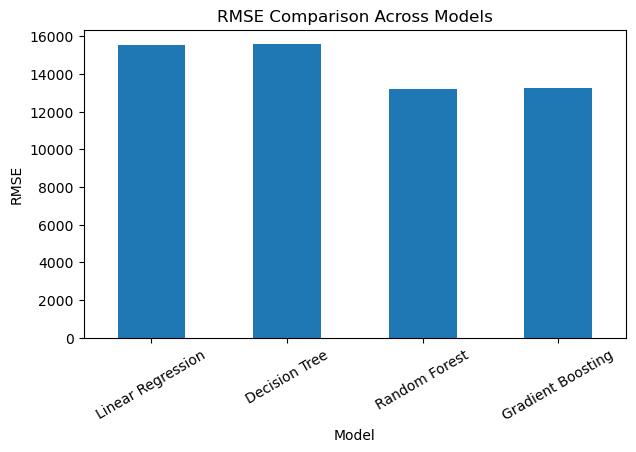

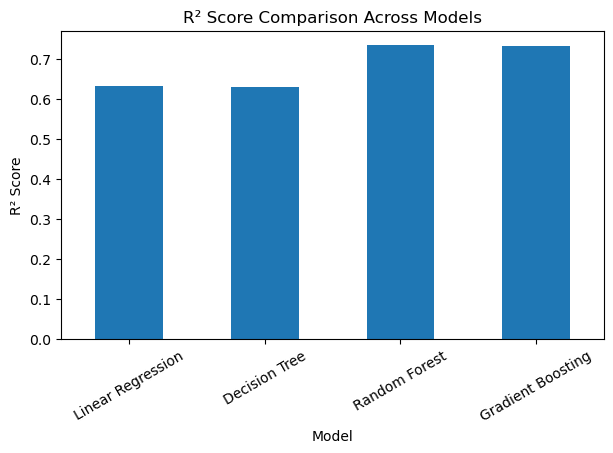

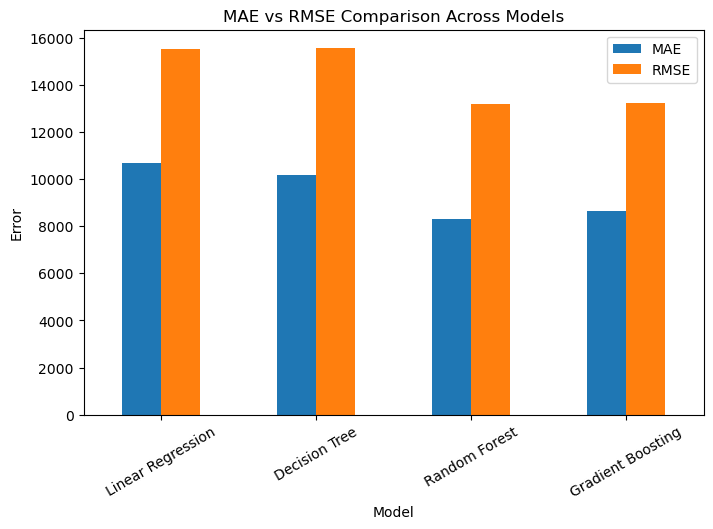

In [37]:
## Evaluate model
results.set_index('Model')['RMSE'].plot(
    kind='bar',
    figsize=(7,4)
)

plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.xticks(rotation=30)
plt.show()


results.set_index('Model')['R2'].plot(
    kind='bar',
    figsize=(7,4)
)

plt.title('R² Score Comparison Across Models')
plt.ylabel('R² Score')
plt.xticks(rotation=30)
plt.show()

results.set_index('Model')[['MAE', 'RMSE']].plot(
    kind='bar',
    figsize=(8,5)
)

plt.title('MAE vs RMSE Comparison Across Models')
plt.ylabel('Error')
plt.xticks(rotation=30)
plt.show()

## Feature importance and feature perpmutation

Top 10 Important Features:
milage                 0.468660
engine_liters          0.162643
model_year             0.129586
brand_Porsche          0.042005
brand_Mercedes-Benz    0.014335
brand_Land             0.009550
brand_Bentley          0.007566
brand_Audi             0.006938
brand_BMW              0.006277
ext_col_Black          0.006116
dtype: float64


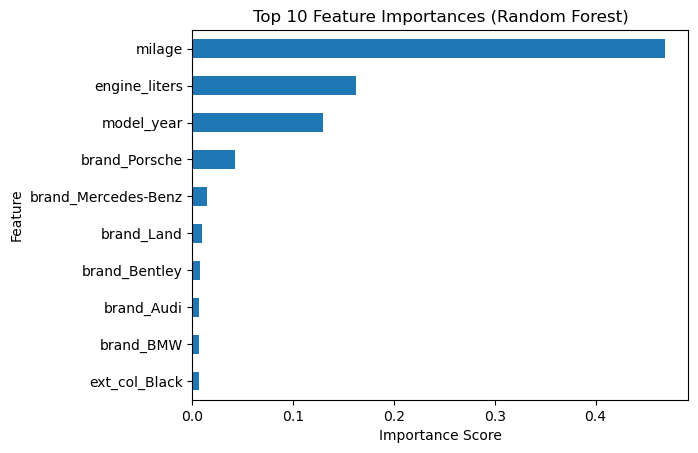

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from trained Random Forest
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Show top 10 features
print("Top 10 Important Features:")
print(feature_importance.head(10))

feature_importance.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Top 10 Permutation Importances:
milage                    6447.953973
engine_liters             5506.973119
model_year                5432.908489
brand_Porsche             1179.644705
brand_Mercedes-Benz        210.391184
brand_Bentley              171.417900
brand_BMW                  136.835802
brand_Audi                  98.784335
transmission_Automatic      68.789403
brand_Land                  66.942401
dtype: float64


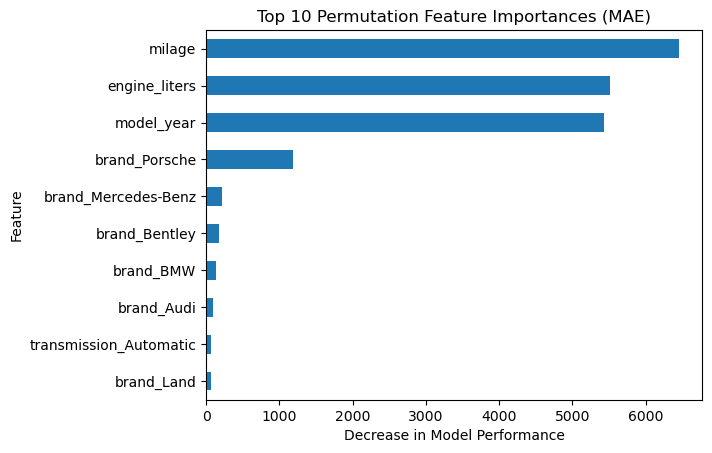

In [39]:
from sklearn.inspection import permutation_importance

# Permutation importance using MAE
perm_importance = permutation_importance(
    rf,
    X_test,
    y_test,
    n_repeats=10,
    random_state=2026,
    scoring='neg_mean_absolute_error'
)

perm_importance_df = pd.Series(
    perm_importance.importances_mean,
    index=X_test.columns
).sort_values(ascending=False)

# Show top 10
print("Top 10 Permutation Importances:")
print(perm_importance_df.head(10))

# Plot
perm_importance_df.head(10).plot(kind='barh')
plt.title('Top 10 Permutation Feature Importances (MAE)')
plt.xlabel('Decrease in Model Performance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

## Iterative model development


In [40]:
# Keep only top 20 features based on permutation importance
top_features = perm_importance_df.head(20).index

X_reduced = X[top_features]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=2026
)

rf_reduced = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=2026,
    n_jobs=-1
)

rf_reduced.fit(X_train_r, y_train_r)
y_pred_r = rf_reduced.predict(X_test_r)

print("Reduced RF MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("Reduced RF R2:", r2_score(y_test_r, y_pred_r))

Reduced RF MAE: 8297.919742285543
Reduced RF R2: 0.737116202415133


In [41]:
mae_baseline = mae_rf
r2_baseline = r2_rf
print("Reduced RF MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("Reduced RF R2:", r2_score(y_test_r, y_pred_r))
mae_reduced = mean_absolute_error(y_test_r, y_pred_r)
r2_reduced = r2_score(y_test_r, y_pred_r)
results = pd.DataFrame({
    'Model': [
        'Baseline Random Forest',
        'Reduced Feature Random Forest'
    ],
    'MAE': [
        mae_baseline,
        mae_reduced
    ],
    'R2': [
        r2_baseline,
        r2_reduced
    ]
})

results

Reduced RF MAE: 8297.919742285543
Reduced RF R2: 0.737116202415133


,Model,MAE,R2
0,Baseline Random Forest,8311.796792,0.733328
1,Reduced Feature Random Forest,8297.919742,0.737116


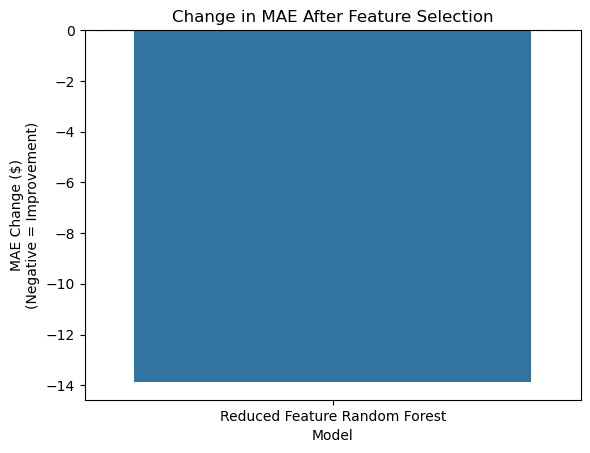

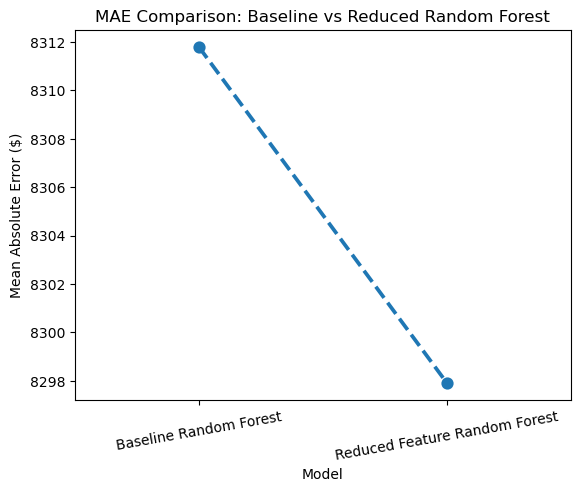

In [42]:
results['MAE_change'] = results['MAE'] - results.loc[0, 'MAE']

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    data=results.iloc[1:],  # only reduced model
    x='Model',
    y='MAE_change'
)

plt.axhline(0, color='black', linestyle='--')
plt.title('Change in MAE After Feature Selection')
plt.ylabel('MAE Change ($)\n(Negative = Improvement)')
plt.xlabel('Model')
plt.show()

sns.pointplot(
    data=results,
    x='Model',
    y='MAE',
    markers='o',
    linestyles='--'
)

plt.title('MAE Comparison: Baseline vs Reduced Random Forest')
plt.ylabel('Mean Absolute Error ($)')
plt.xlabel('Model')
plt.xticks(rotation=10)
plt.show()

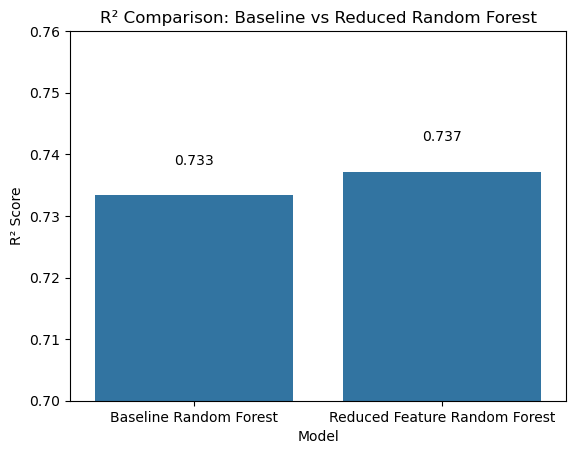

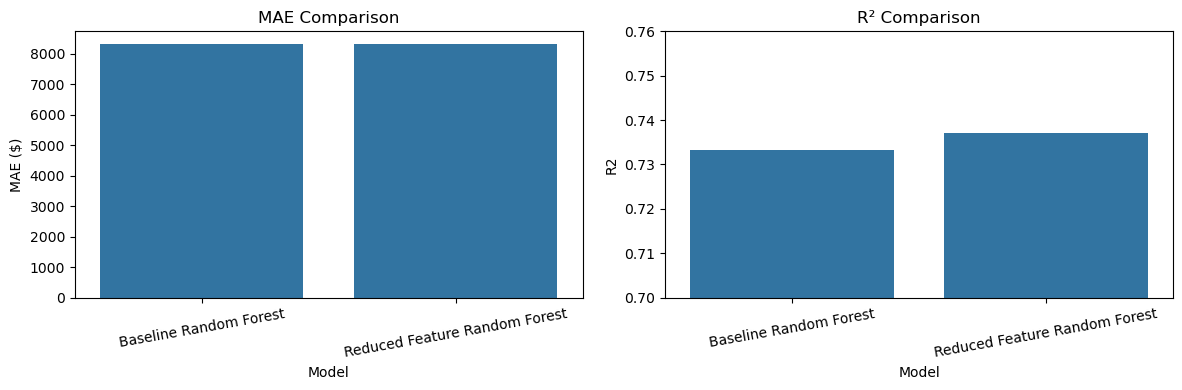

In [43]:
sns.barplot(
    data=results,
    x='Model',
    y='R2'
)

for i, v in enumerate(results['R2']):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center')

plt.title('R² Comparison: Baseline vs Reduced Random Forest')
plt.ylim(0.70, 0.76)  # zoom in to show improvement
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=results, x='Model', y='MAE', ax=axes[0])
axes[0].set_title('MAE Comparison')
axes[0].set_ylabel('MAE ($)')
axes[0].tick_params(axis='x', rotation=10)

sns.barplot(data=results, x='Model', y='R2', ax=axes[1])
axes[1].set_title('R² Comparison')
axes[1].set_ylim(0.70, 0.76)
axes[1].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(200, 501), 
    'max_depth': [10, 15, None], 
    'min_samples_leaf': randint(1, 6), 
    'min_samples_split': randint(2, 11), 
    'max_features': ['sqrt', 'log2', 0.5]    
}

rf_base = RandomForestRegressor(
    random_state=2026,
    n_jobs=-1
)

rs_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,         
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=2026,
    n_jobs=-1
)

rs_rf.fit(X_train_r, y_train_r)

print("Best Parameters:", rs_rf.best_params_)

rf_tuned = rs_rf.best_estimator_

y_pred_tuned = rf_tuned.predict(X_test_r)

mae_tuned = mean_absolute_error(y_test_r, y_pred_tuned)
r2_tuned = r2_score(y_test_r, y_pred_tuned)

print("Tuned RF MAE:", mae_tuned)
print("Tuned RF R2:", r2_tuned)

Best Parameters: {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 452}
Tuned RF MAE: 8077.842081257018
Tuned RF R2: 0.7468238767222446


In [57]:
results_rf = pd.DataFrame({
    'Model': [
        'Baseline Random Forest',
        'Reduced Feature Random Forest',
        'Tuned Reduced Feature Random Forest'
    ],
    'MAE': [
        mae_rf,    
        mae_reduced,   
        mae_tuned     
    ],
    'R2': [
        r2_rf,
        r2_reduced,
        r2_tuned
    ]
})

results_rf

,Model,MAE,R2
0,Baseline Random Forest,8311.796792,0.733328
1,Reduced Feature Random Forest,8297.919742,0.737116
2,Tuned Reduced Feature Random Forest,8077.842081,0.746824


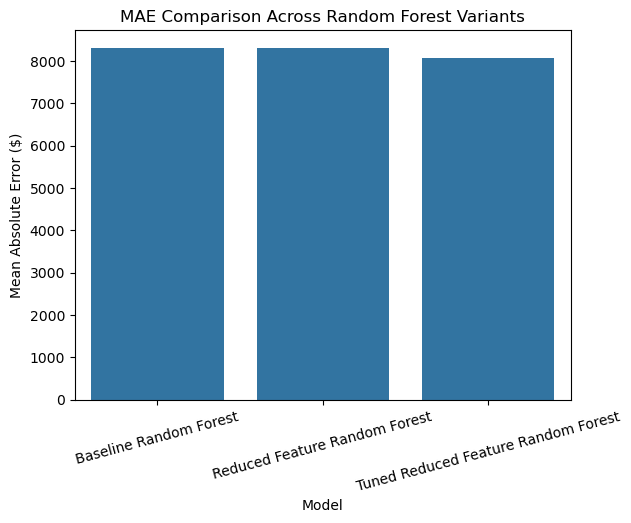

In [58]:
sns.barplot(
    data=results_rf,
    x='Model',
    y='MAE'
)

plt.title('MAE Comparison Across Random Forest Variants')
plt.ylabel('Mean Absolute Error ($)')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.show()

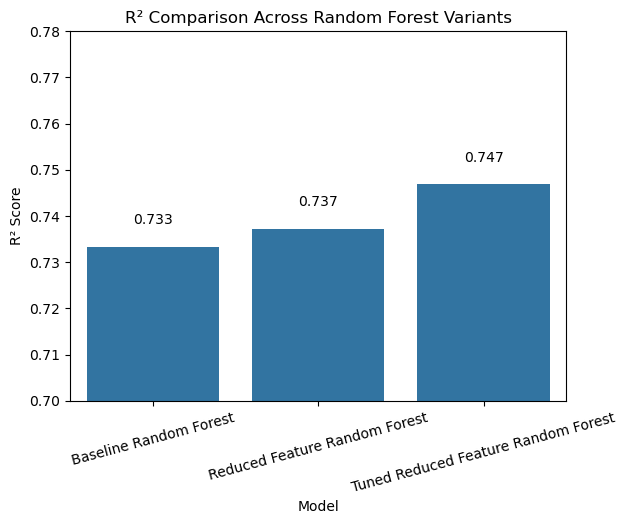

In [59]:
sns.barplot(
    data=results_rf,
    x='Model',
    y='R2'
)

for i, v in enumerate(results_rf['R2']):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center')

plt.title('R² Comparison Across Random Forest Variants')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0.70, 0.78)
plt.xticks(rotation=15)
plt.show()

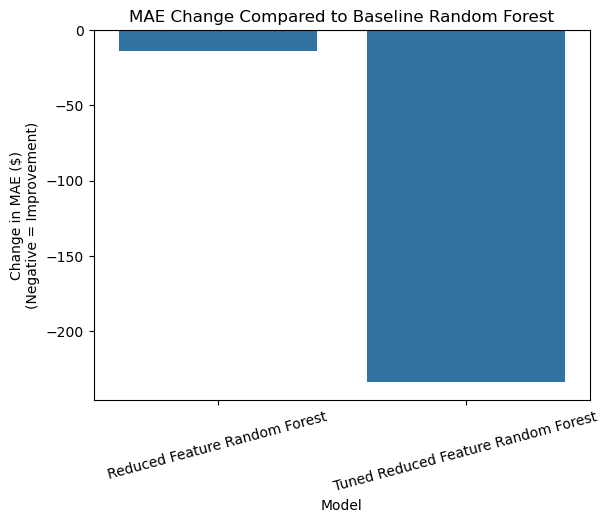

In [60]:
results_rf['MAE_Improvement'] = results_rf['MAE'] - results_rf.loc[0, 'MAE']

sns.barplot(
    data=results_rf.iloc[1:],
    x='Model',
    y='MAE_Improvement'
)

plt.axhline(0, color='black', linestyle='--')
plt.title('MAE Change Compared to Baseline Random Forest')
plt.ylabel('Change in MAE ($)\n(Negative = Improvement)')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.show()

## Streamlit

In [ ]:
import joblib

joblib.dump(rf_tuned, "used_car_price_model.pkl")


['used_car_price_model.pkl']